## Full MNIST dataset

Complete all the steps in this chapter using the full MNIST datasets (for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You’ll need to do some of your own research to figure out how to overcome obstacles you’ll meet on the way.

# Libraries

In [1]:
# Prepare notebook
from fastai.vision.all import *

In [2]:
# Prepare notebook
from fastbook import *    
matplotlib.rc('image', cmap='Greys')

In [3]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Data

In [4]:
# Get MNIST data. Return object is the path where data is located
path = untar_data(URLs.MNIST)

In [5]:
# Set BASE_PATH of Path to the MNIST data location
Path.BASE_PATH = path

In [6]:
# Review contents of path
path.ls()

(#2) [Path('training'),Path('testing')]

In [7]:
# Review contents of train folder
(path/'training').ls()

(#10) [Path('training/9'),Path('training/0'),Path('training/7'),Path('training/6'),Path('training/1'),Path('training/8'),Path('training/4'),Path('training/3'),Path('training/2'),Path('training/5')]

In [8]:
train_nums_paths = [(path/'training'/f'{i}').ls() for i in range(10)]

In [9]:
# Review one image
im_path = train_nums_paths[1][1]
im = Image.open(im_path)
im

In [10]:
# Create a dataframe colour map of image
imt = tensor(im)
df = pd.DataFrame(imt)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,255,208,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,31,219,253,252,82,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,66,253,253,253,84,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,120,253,253,253,84,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,116,248,253,253,253,84,0,0,0,0,0,0,0,0,0,0


# Baseline

We will create a baseline calculation to check what the number is. We will be calculating the average digit by calculating the average for each position in the image.

In [11]:
train_nums_paths[0]

(#5923) [Path('training/0/16585.png'),Path('training/0/24537.png'),Path('training/0/25629.png'),Path('training/0/20751.png'),Path('training/0/34730.png'),Path('training/0/15926.png'),Path('training/0/22152.png'),Path('training/0/35348.png'),Path('training/0/22634.png'),Path('training/0/6819.png')...]

In [12]:
# Create a list of tensors
train_nums_tens = []

for p in train_nums_paths:
    train_nums_tens.append([tensor(Image.open(i)) for i in p])

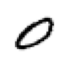

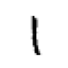

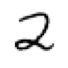

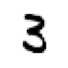

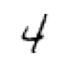

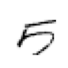

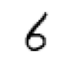

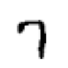

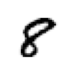

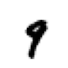

In [13]:
# Review the list of tensors
for i in train_nums_tens:
    show_image(i[np.random.randint(0,len(i))])

In [14]:
# Stack the tensors and normalise them between 0 and 1
train_stacked_nums = []
for i in train_nums_tens:
    train_stacked_nums.append(torch.stack(i).float()/255)

[i.shape for i in train_stacked_nums]

[torch.Size([5923, 28, 28]),
 torch.Size([6742, 28, 28]),
 torch.Size([5958, 28, 28]),
 torch.Size([6131, 28, 28]),
 torch.Size([5842, 28, 28]),
 torch.Size([5421, 28, 28]),
 torch.Size([5918, 28, 28]),
 torch.Size([6265, 28, 28]),
 torch.Size([5851, 28, 28]),
 torch.Size([5949, 28, 28])]

In [15]:
# Check the stacked tensors size against the number of images in the train folder
np.array([i.shape[0] for i in train_stacked_nums])==np.array([len(i) for i in train_nums_paths])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True])

In [16]:
# Review rank of tensor
[i.ndim for i in train_stacked_nums]

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [17]:
# Calculate the average number accross all images
nums_means = [i.mean(axis=0) for i in train_stacked_nums]
nums_means_tensor = torch.stack(nums_means,dim=0)

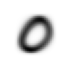

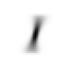

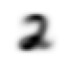

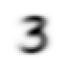

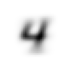

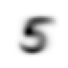

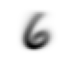

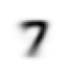

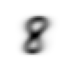

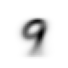

In [18]:
# Display means
for i in nums_means:
    show_image(i)

## Deviation from baseline

### Train data

We'll calculate the L1 and L2 norms for sample numbers in the training dataset. 

Mean absolute difference is called the L1 norm. Root mean squared error is called the L2 norm.  

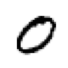

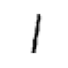

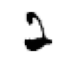

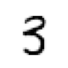

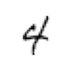

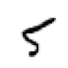

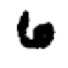

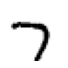

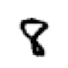

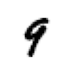

In [19]:
# Create samples tensor
s1 = [i[np.random.randint(len(i))] for i in train_stacked_nums]
samples = torch.stack(s1,dim=0)
for i in samples:
    show_image(i)

In [20]:
torch.FloatTensor([(samples[0]-i).abs().mean().item() for i in nums_means_tensor])

tensor([0.1372, 0.1935, 0.2175, 0.1874, 0.2012, 0.1657, 0.2025, 0.1942, 0.1951, 0.1919])

In [21]:
# Calculate the mean absolute difference (L1 norm). Rows are samples, columns
# are average numbers
samples_L1 = (samples[:,None]-nums_means_tensor).abs().mean(dim=(-2,-1))
print("L1")
samples_L1

L1


tensor([[0.1372, 0.1935, 0.2175, 0.1874, 0.2012, 0.1657, 0.2025, 0.1942, 0.1951, 0.1919],
        [0.1805, 0.0537, 0.1408, 0.1317, 0.1299, 0.1294, 0.1352, 0.1154, 0.1361, 0.1204],
        [0.1861, 0.1405, 0.1372, 0.1584, 0.1643, 0.1666, 0.1326, 0.1551, 0.1664, 0.1628],
        [0.1829, 0.1257, 0.1661, 0.1139, 0.1463, 0.1301, 0.1688, 0.1527, 0.1351, 0.1421],
        [0.1764, 0.0987, 0.1420, 0.1436, 0.0970, 0.1283, 0.1261, 0.1144, 0.1333, 0.1082],
        [0.1870, 0.1159, 0.1806, 0.1622, 0.1365, 0.1453, 0.1656, 0.1406, 0.1535, 0.1411],
        [0.2392, 0.2530, 0.2259, 0.2541, 0.2154, 0.2650, 0.2135, 0.2358, 0.2479, 0.2351],
        [0.2007, 0.1660, 0.2026, 0.1803, 0.1714, 0.1825, 0.1873, 0.1443, 0.1986, 0.1670],
        [0.2006, 0.1371, 0.1679, 0.1644, 0.1383, 0.1627, 0.1693, 0.1323, 0.1438, 0.1228],
        [0.1952, 0.1108, 0.1612, 0.1527, 0.1232, 0.1410, 0.1501, 0.1220, 0.1284, 0.1118]])

In [22]:
# Calculate the Mean squared error (L2 norm). Rows are samples, columns
# are average numbers
samples_L2 = ((samples[:,None]-nums_means_tensor)**2).mean(dim=(-2,-1)).sqrt()
print('L2')
samples_L2

L2


tensor([[0.2411, 0.3757, 0.3575, 0.3288, 0.3561, 0.2918, 0.3523, 0.3528, 0.3373, 0.3465],
        [0.3057, 0.1328, 0.2404, 0.2376, 0.2437, 0.2260, 0.2494, 0.2271, 0.2424, 0.2332],
        [0.3157, 0.3111, 0.2361, 0.2878, 0.3051, 0.2961, 0.2448, 0.2990, 0.2951, 0.3070],
        [0.3115, 0.2836, 0.2879, 0.2062, 0.2768, 0.2337, 0.3065, 0.2972, 0.2450, 0.2738],
        [0.3022, 0.2351, 0.2482, 0.2598, 0.1831, 0.2268, 0.2335, 0.2255, 0.2428, 0.2143],
        [0.3174, 0.2694, 0.3071, 0.2860, 0.2600, 0.2564, 0.2980, 0.2756, 0.2738, 0.2738],
        [0.3905, 0.4504, 0.3721, 0.4162, 0.3719, 0.4249, 0.3668, 0.4035, 0.4050, 0.3992],
        [0.3357, 0.3404, 0.3388, 0.3177, 0.3125, 0.3135, 0.3310, 0.2782, 0.3397, 0.3086],
        [0.3371, 0.2979, 0.2905, 0.2932, 0.2630, 0.2874, 0.3050, 0.2587, 0.2586, 0.2403],
        [0.3316, 0.2608, 0.2785, 0.2749, 0.2354, 0.2521, 0.2766, 0.2445, 0.2320, 0.2193]])

### Validation data

In [23]:
(path/'testing').ls()

(#10) [Path('testing/9'),Path('testing/0'),Path('testing/7'),Path('testing/6'),Path('testing/1'),Path('testing/8'),Path('testing/4'),Path('testing/3'),Path('testing/2'),Path('testing/5')]

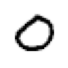

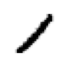

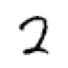

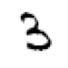

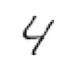

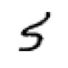

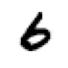

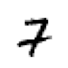

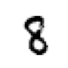

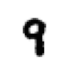

In [24]:
# Create list of validation dataset images
valid_nums_paths = [(path/'testing'/f'{i}').ls() for i in range(10)]

# Create a list of tensors
valid_nums_tens = [[tensor(Image.open(i)) for i in p] for p in valid_nums_paths]

# Review the list of tensors
for i in valid_nums_tens:
    show_image(i[np.random.randint(0,len(i))])

In [25]:
# Stack the tensors and normalise between 0 and 1
valid_stacked_nums = [torch.stack(i).float()/255 for i in valid_nums_tens]

# Check stacked tensors size with the images in the images paths
print(np.array([i.shape[0] for i in valid_stacked_nums])==np.array([len(i) for i in valid_nums_paths]))

# Review the rank of the the validation stacked tensors
print([i.ndim for i in valid_stacked_nums])

[ True  True  True  True  True  True  True  True  True  True]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


### Calculation

In [26]:
# Function to check the deviation to the average number
def mnist_distance(a,b):
    return (a-b).abs().mean(dim=(-1,-2))

In [27]:
# Calculate the distance for all numbers in the dataset

valid_dist = [mnist_distance(a[:,None],nums_means_tensor) for a in valid_stacked_nums]
len(valid_dist)

np.array([i.shape[0] for i in valid_dist])==np.array([i.shape[0] for i in valid_stacked_nums])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True])

In [28]:
[i.shape for i in valid_dist]

[torch.Size([980, 10]),
 torch.Size([1135, 10]),
 torch.Size([1032, 10]),
 torch.Size([1010, 10]),
 torch.Size([982, 10]),
 torch.Size([892, 10]),
 torch.Size([958, 10]),
 torch.Size([1028, 10]),
 torch.Size([974, 10]),
 torch.Size([1009, 10])]

In [29]:
# Predict the number they belong to based on the minimum distance
preds = [torch.min(i,1)[1] for i in valid_dist]
np.array([i.shape[0] for i in preds])==np.array([i.shape[0] for i in valid_stacked_nums])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True])

In [30]:
[i.shape for i in preds]

[torch.Size([980]),
 torch.Size([1135]),
 torch.Size([1032]),
 torch.Size([1010]),
 torch.Size([982]),
 torch.Size([892]),
 torch.Size([958]),
 torch.Size([1028]),
 torch.Size([974]),
 torch.Size([1009])]

In [31]:
# Concat predictions
preds_concat = torch.concat(preds)
print(f'CHECK\nPred: {preds_concat.shape[0]:,}\nList: {sum([i.shape[0] for i in preds]):,}')

CHECK
Pred: 10,000
List: 10,000


In [32]:
# Create tensor of true values
ys = [torch.ones_like(t)*i for i,t in enumerate(preds)]
np.array([i.shape[0] for i in ys])==np.array([i.shape[0] for i in preds])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True])

In [33]:
# Concat tensor of true values
ys_concat = torch.concat(ys)
print(f'CHECK\nPred: {ys_concat.shape[0]:,}\nList: {sum([i.shape[0] for i in ys]):,}')

CHECK
Pred: 10,000
List: 10,000


In [34]:
# Calculate the overall accuracy and accuracy for each digit.
accuracy = [(p==y).sum()/p.shape[0] if p.shape[0]==y.shape[0] else "Error" for p,y in zip(preds,ys) ]
if preds_concat.shape[0]==ys_concat.shape[0]: overall_accuracy = (preds_concat==ys_concat).sum()/preds_concat.shape[0]
else: overall_accuracy = "Error"

overall_accuracy, [(i,j) for i,j in enumerate(accuracy)]

(tensor(0.6685),
 [(0, tensor(0.8153)),
  (1, tensor(0.9982)),
  (2, tensor(0.4234)),
  (3, tensor(0.6089)),
  (4, tensor(0.6680)),
  (5, tensor(0.3262)),
  (6, tensor(0.7871)),
  (7, tensor(0.7646)),
  (8, tensor(0.4425)),
  (9, tensor(0.7760))])

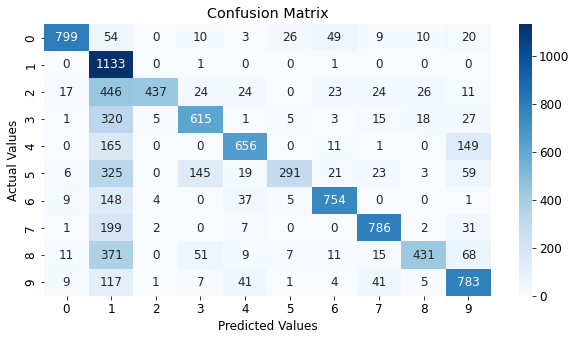

In [35]:
# Confusion matrix
cm = confusion_matrix(ys_concat, preds_concat)
plt.figure(figsize=(10,5))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

# Manual implementation

In [117]:
# Change the concatenated train tensors from a list of matrices (rank-3 tensor) 
# to a list of vectors (rank-2 tensor)
train_x = torch.cat(train_stacked_nums).view(-1,28*28)
train_x.shape

torch.Size([60000, 784])

In [118]:
# Create a tensor of train labels
train_y = torch.cat([tensor([i]*len(t)) for i,t in enumerate(train_stacked_nums)]).unsqueeze(1)
train_y.shape

torch.Size([60000, 1])

In [119]:
# Zip train_x and train_y to create an object in the right shape
# for pytorch Dataset object
train_dset = list(zip(train_x, train_y))

In [120]:
# Create a training data loader
train_dl = DataLoader(train_dset, batch_size=64, shuffle=True)

In [121]:
# Create validation datasets
valid_x = torch.cat(valid_stacked_nums).view(-1,28*28)
valid_y = torch.cat([tensor([i]*len(t)) for i,t in enumerate(valid_stacked_nums)]).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))
valid_x.shape, valid_y.shape

(torch.Size([10000, 784]), torch.Size([10000, 1]))

In [122]:
simple_net = nn.Sequential(
    nn.Linear(28*28,100),
    nn.ReLU(),
    nn.Linear(100,30),
    nn.ReLU(),
    nn.Linear(30,10)
)

In [123]:
mnist_loss = nn.CrossEntropyLoss()

In [124]:
def batch_accuracy(pred,target):
    return (torch.max(pred,1)[1]==target.squeeze()).sum()/target.shape[0]

In [125]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb.squeeze())
    loss.backward()
    return loss

In [126]:
class BasicOptim:
    def __init__(self, params, lr): self.params, self.lr = list(params), lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [127]:
# Epoch training
def train_epoch(model,dl):
    batch_loss = []
    for xb, yb in dl:
        batch_loss.append(calc_grad(xb,yb,model))
        opt.step()
        opt.zero_grad()
    print('\tAvg batch loss: ',tensor(batch_loss).mean())

In [128]:
# Model training
def train_model(model,epochs,dl):
    for i in range(epochs):
        train_epoch(model,dl)
        print('epoch',i,': ',batch_accuracy(model(valid_x),valid_y),end=' ')

In [129]:
# Initialise optimizer
opt = BasicOptim(simple_net.parameters(),lr=1e-3)

In [131]:
# Model training
train_model(simple_net, 100, train_dl)

	Avg batch loss:  tensor(2.2594)
epoch 0 :  tensor(0.3888) 	Avg batch loss:  tensor(2.2104)
epoch 1 :  tensor(0.5769) 	Avg batch loss:  tensor(2.1308)
epoch 2 :  tensor(0.6086) 	Avg batch loss:  tensor(2.0029)
epoch 3 :  tensor(0.6303) 	Avg batch loss:  tensor(1.8049)
epoch 4 :  tensor(0.6542) 	Avg batch loss:  tensor(1.5390)
epoch 5 :  tensor(0.7085) 	Avg batch loss:  tensor(1.2598)
epoch 6 :  tensor(0.7540) 	Avg batch loss:  tensor(1.0349)
epoch 7 :  tensor(0.7842) 	Avg batch loss:  tensor(0.8799)
epoch 8 :  tensor(0.8054) 	Avg batch loss:  tensor(0.7743)
epoch 9 :  tensor(0.8225) 	Avg batch loss:  tensor(0.6983)
epoch 10 :  tensor(0.8328) 	Avg batch loss:  tensor(0.6411)
epoch 11 :  tensor(0.8426) 	Avg batch loss:  tensor(0.5963)
epoch 12 :  tensor(0.8508) 	Avg batch loss:  tensor(0.5604)
epoch 13 :  tensor(0.8577) 	Avg batch loss:  tensor(0.5310)
epoch 14 :  tensor(0.8632) 	Avg batch loss:  tensor(0.5067)
epoch 15 :  tensor(0.8698) 	Avg batch loss:  tensor(0.4866)
epoch 16 :  tenso

# FastAI packages

In [132]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [140]:
# Create data loader
dls = ImageDataLoaders.from_folder(path,train='training',valid='testing',num_workers=0)

# Create a learner
learn = vision_learner(dls, resnet18, pretrained=True, 
                       loss_func=F.cross_entropy,metrics=accuracy,
                       n_out=10)

In [141]:
learn.fit_one_cycle(1,0.1,)

epoch,train_loss,valid_loss,None,None,None,None,None,None,None,None,None,None,time


TypeError: Exception occured in `Recorder` when calling event `after_batch`:
	'Tensor' object is not callable